# Hand Digit recognizer: Project Code
## Nildip Chaudhuri

In [91]:
# imports

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import warnings
import seaborn as sn
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
warnings.filterwarnings("ignore")


## Data preprocessing, Visualization of preprocessing, Data Quality Report

In [60]:
# basic data visualization

meta_data = pd.read_csv('mnst_data.csv')
print("The number of columns is: ", meta_data.shape[0])
print("The number of rows are: ",meta_data.shape[-1])
meta_data.head(4)



The number of columns is:  60000
The number of rows are:  786


,Unnamed: 0,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
meta_data.describe()

,Unnamed: 0,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,29999.500000,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,17320.652413,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,14999.750000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,29999.500000,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,44999.250000,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,59999.000000,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


The value seen in the data  5


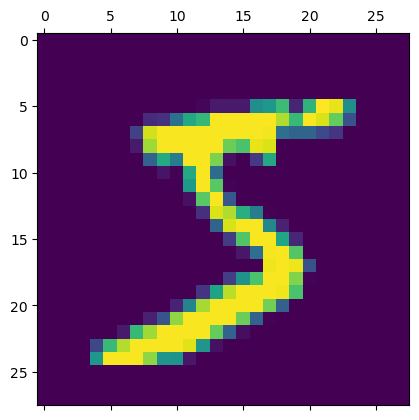

In [251]:
# show an example of a number

meta_data_val_x = meta_data.drop(['Unnamed: 0','label'],axis=1).values
example_show = np.array(meta_data_val_x[0]).reshape(28,28)
print("The value seen in the data ",meta_data['label'][0])
plt.matshow(example_show)
plt.show()

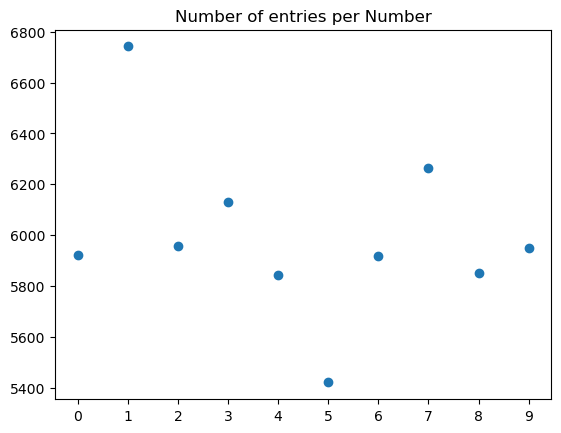

In [247]:
# show number totals

info_on_data = [[],[]]
for i in range(10):
    info_on_data[0].append(i)
    info_on_data[1].append(meta_data[meta_data['label']==i].shape[0])

plt.scatter(info_on_data[0],info_on_data[1])
plt.title('Number of entries per Number')
plt.xticks(info_on_data[0])
plt.show()

In [84]:
# Post process data

processed_data = meta_data.drop(['Unnamed: 0'], axis=1)
processed_data_y = processed_data['label']
processed_data_x = processed_data.drop(['label'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(processed_data_x,processed_data_y,
                                    train_size=0.8, stratify=processed_data_y)

# rgb values have a max value of 255 (white)
# as a result I need to normalize the values as ml models work better

x_train = x_train/255
x_test = x_test/255


### Initial observation of meta data

* There is a unnamed column which simply tells you you the row count. As a result this column will not be needed
* There is also 60 000 data instances with no data irregularity issues 
    * no null values, no missing values etc
* the flat file indicate that there are 784 features. 
    * This is representative of one pixel each which means it is a 28x28 image (${\sqrt784}$)
    * an example of an image is seen in the cell above
* next I checked some labels (number) entries are greater than others
    * There were significantly more 1 entries and lower than average 5 entries
    * this is seen in the scatter plot above
    * there are no good solutions for this as we may need to use neural networks.
        * it would make sense to add data, not remove it, however both at not possible in this case
* the original data was already flattened (1d array) so I did not need to alter that
* I created a train test split and I made sure to stratify it
* It is easier for the feature data to be normalized so I did so with the training and test feature data
    * as the max RGB value is 255, all I had to do is divide it by that number


# Model Selection

* so by now I know that it is a multi-classification problem

* based on the above we have a choice of using the following models
    * Decision tree
        * since the image size is fixed, the decision tree (each pixel as a feature) could be useful
    * Random Forest
        * same reason as Decision tree, but it would be less sensitive to training data, which will benefit our model as we have a lot of features
    * cnn neural network
        * this might produce the best results as we would have 784 nodes in the input layer and 10 nodes in the output layer
        * we could have more hidden layers and increase the epoch value to improve the model performance, but we may also encounter over fitting 
            * need to make sure that over fitting does not happen
        * I expect this model to work better than the trees as we are dealing with continuos features 
 

 # Model Evaluation and Performance

## Decision Tree model

In [107]:
from sklearn.tree import DecisionTreeClassifier

decision_model = DecisionTreeClassifier(criterion='gini',splitter='best')

decision_model.fit(x_train,y_train)


DecisionTreeClassifier()

In [108]:
predicted_y_decision_tree = decision_model.predict(x_test)

The over all accuracy of the model is:  0.8641666666666666


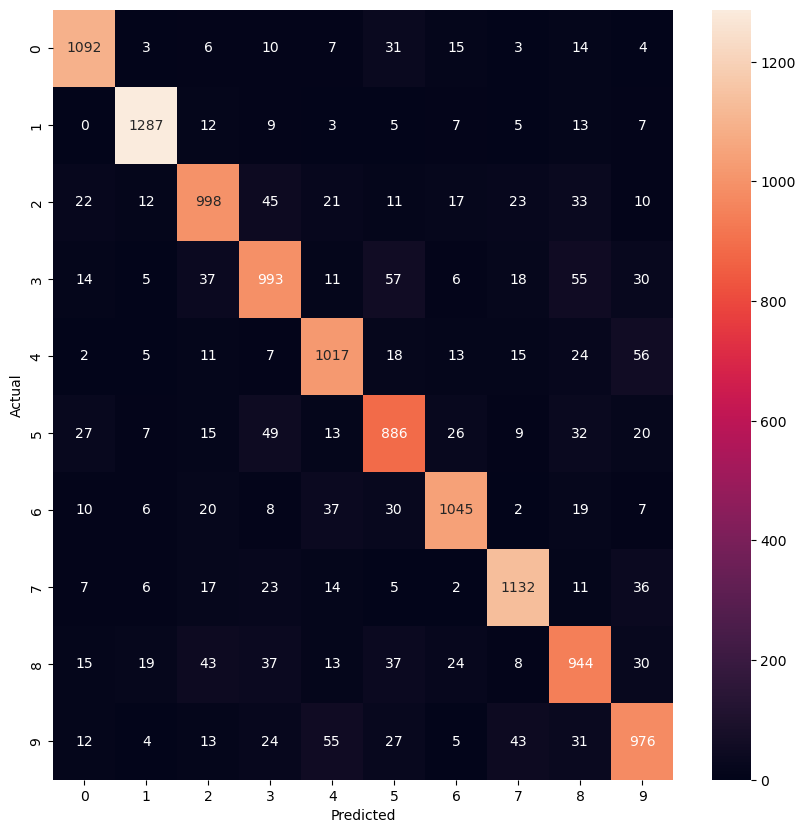

In [109]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=predicted_y_decision_tree)

plt.figure(figsize=(10,10))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print("The over all accuracy of the model is: ", decision_model.score(x_test,y_test))
plt.show()


### Decision Tree Model conclusions

* the overall model accuracy is not the best, but its not the worst either (roughly 87%)
* As the features are continuos (normalized RGB values) I believe the model might not be the best option
    * Like most decision tree it will suffer from over-fitting especially with feature sensitive data 

## Random Forest Model

In [117]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(criterion='gini',n_estimators=100)
forest_model.fit(x_train,y_train)

RandomForestClassifier()

In [254]:
predicted_y_forest= forest_model.predict(x_test)

The overall accuracy of the model is:  0.966


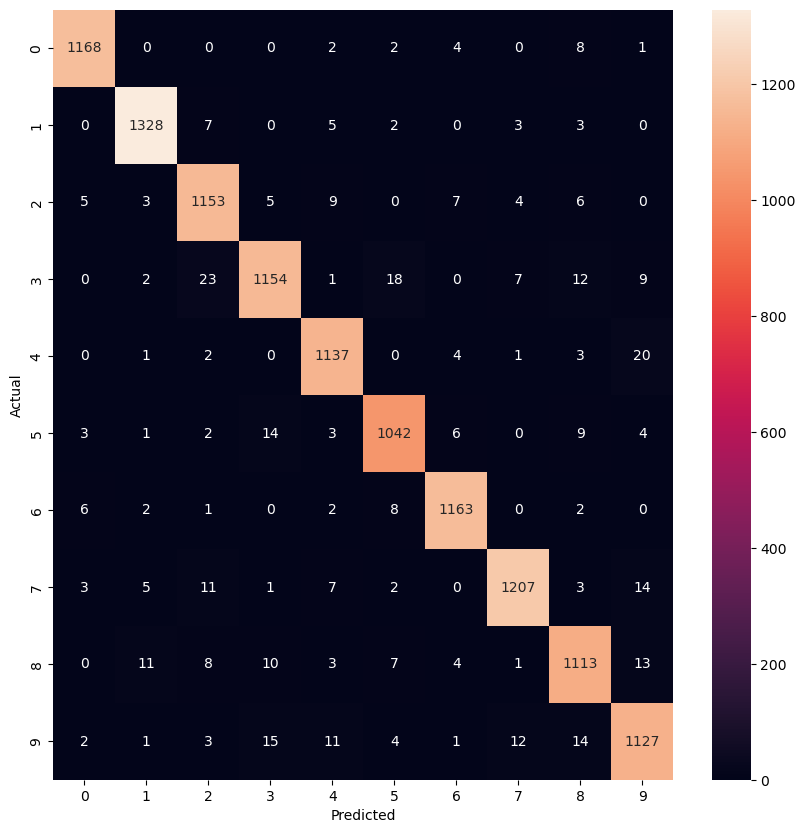

In [255]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=predicted_y_forest)

plt.figure(figsize=(10,10))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print("The overall accuracy of the model is: ", round(forest_model.score(x_test,y_test),3))
plt.show()

### Random Forest Model conclusion

* As expected it worked much better as we are using probabilistic decision making with multiple trees

## CNN Model

* chose this model over RNN and ANN as CNN is best suited for image data

### Basic ANN model (no hidden layers): Dense Model

In [139]:
basic_model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,), activation='sigmoid')
])

basic_model.compile(
    optimizer ='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']

)

basic_model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1500/1500 [==============================] - 1s 499us/step - loss: 0.5006 - accuracy: 0.8710
Epoch 2/10
1500/1500 [==============================] - 1s 496us/step - loss: 0.3142 - accuracy: 0.9127
Epoch 3/10
1500/1500 [==============================] - 1s 498us/step - loss: 0.2903 - accuracy: 0.9194
Epoch 4/10
1500/1500 [==============================] - 1s 500us/step - loss: 0.2784 - accuracy: 0.9222
Epoch 5/10
1500/1500 [==============================] - 1s 497us/step - loss: 0.2707 - accuracy: 0.9245
Epoch 6/10
1500/1500 [==============================] - 1s 497us/step - loss: 0.2650 - accuracy: 0.9261
Epoch 7/10
1500/1500 [==============================] - 1s 504us/step - loss: 0.2605 - accuracy: 0.9277
Epoch 8/10
1500/1500 [==============================] - 1s 498us/step - loss: 0.2571 - accuracy: 0.9274
Epoch 9/10
1500/1500 [==============================] - 1s 496us/step - loss: 0.2544 - accuracy: 0.9292
Epoch 10/10
1500/1500 [==============================] - 1s 498u

In [140]:
basic_model.evaluate(x_test,y_test)

375/375 [==============================] - 0s 413us/step - loss: 0.2705 - accuracy: 0.9277


[0.27048975229263306, 0.9276666641235352]

In [141]:
basic_model_predicted = basic_model.predict(x_test)
basic_model_predicted_labels_y = [np.argmax(i) for i in basic_model_predicted]

375/375 [==============================] - 0s 353us/step


The accuracy score for the basic model is:  0.9267038990399588


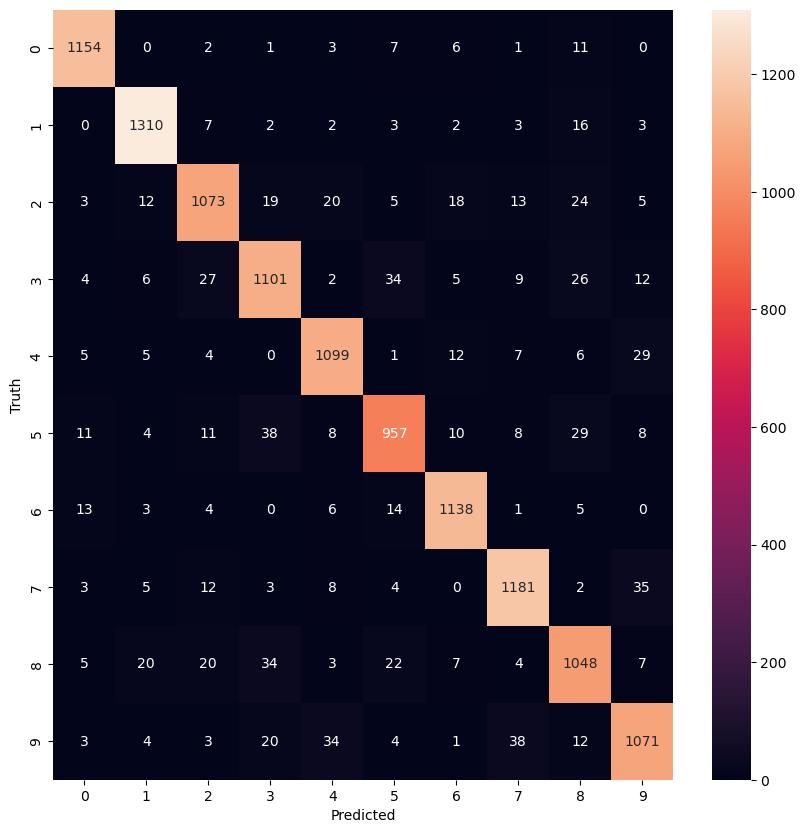

In [144]:
from sklearn.metrics import precision_score

cm = tf.math.confusion_matrix(labels=y_test,predictions=basic_model_predicted_labels_y)

plt.figure(figsize=(10,10))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
print("The accuracy score for the basic model is: ",
    precision_score(basic_model_predicted_labels_y,y_test, average='macro'))
plt.ylabel('Truth')
plt.show()



* we can see that the basic model is already better than the decision tree and the random forest models
* we just used two layers in our CNN
    * the input layer:
        * 784 (each pixel in the 28x28 picture)
    * 10 output nodes:
        * as it is a multi-classifier task we just need to find what number it is (0-9)
* we are now going to try use hidden layers to improve model accuracy

### ANN with one hidden layer

In [216]:
simple_model_2 = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid'),

])

simple_model_2.compile(optimizer='adam'
                     , loss='sparse_categorical_crossentropy',
                     metrics=['accuracy']
                     )

history_1 = simple_model_2.fit(x_train,y_train,epochs=100)

Epoch 1/100
1500/1500 [==============================] - 1s 572us/step - loss: 0.2988 - accuracy: 0.9149
Epoch 2/100
1500/1500 [==============================] - 1s 575us/step - loss: 0.1389 - accuracy: 0.9601
Epoch 3/100
1500/1500 [==============================] - 1s 577us/step - loss: 0.0960 - accuracy: 0.9716
Epoch 4/100
1500/1500 [==============================] - 1s 577us/step - loss: 0.0716 - accuracy: 0.9788
Epoch 5/100
1500/1500 [==============================] - 1s 576us/step - loss: 0.0556 - accuracy: 0.9830
Epoch 6/100
1500/1500 [==============================] - 1s 576us/step - loss: 0.0436 - accuracy: 0.9870
Epoch 7/100
1500/1500 [==============================] - 1s 575us/step - loss: 0.0359 - accuracy: 0.9892
Epoch 8/100
1500/1500 [==============================] - 1s 577us/step - loss: 0.0283 - accuracy: 0.9915
Epoch 9/100
1500/1500 [==============================] - 1s 591us/step - loss: 0.0233 - accuracy: 0.9931
Epoch 10/100
1500/1500 [==============================]

In [217]:
simple_model_2.evaluate(x_test,y_test)

375/375 [==============================] - 0s 467us/step - loss: 0.2177 - accuracy: 0.9763


[0.21769766509532928, 0.9763333201408386]

In [218]:
simple_model_2_predicted = simple_model_2.predict(x_test)
simple_model_predicted_labels_y = [np.argmax(i) for i in simple_model_2_predicted]

375/375 [==============================] - 0s 404us/step


The accuracy score for the basic model is:  0.967


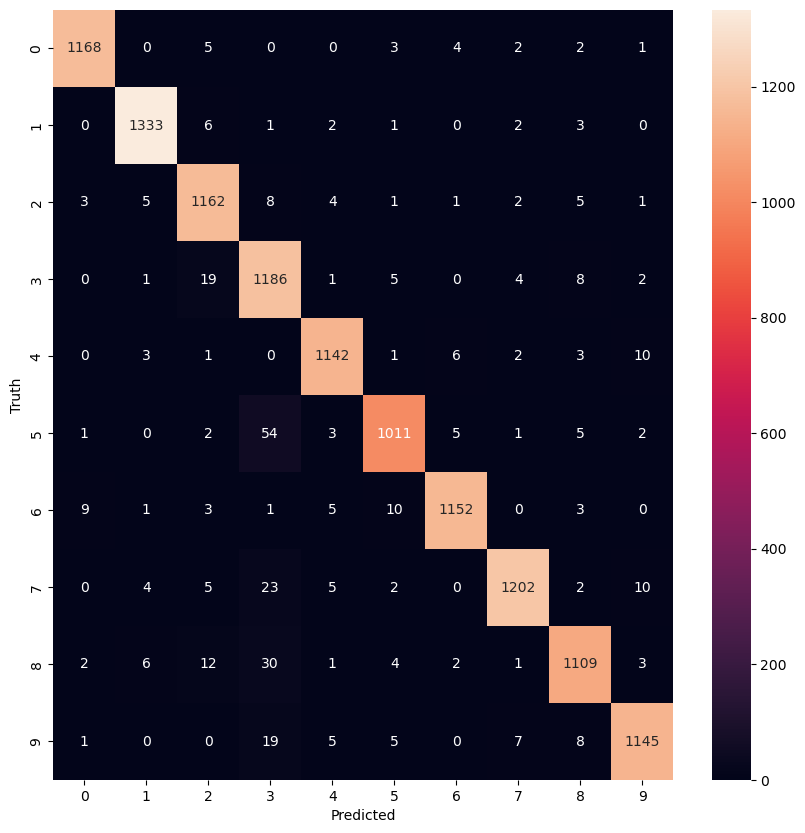

In [219]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=simple_model_predicted_labels_y)

plt.figure(figsize=(10,10))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
print("The accuracy score for the basic model is: ",
    round(precision_score(simple_model_predicted_labels_y,y_test, average='macro'),3))
plt.ylabel('Truth')
plt.show()


In [220]:
simple_model_2.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 100)               78500     
                                                                 
 dense_39 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


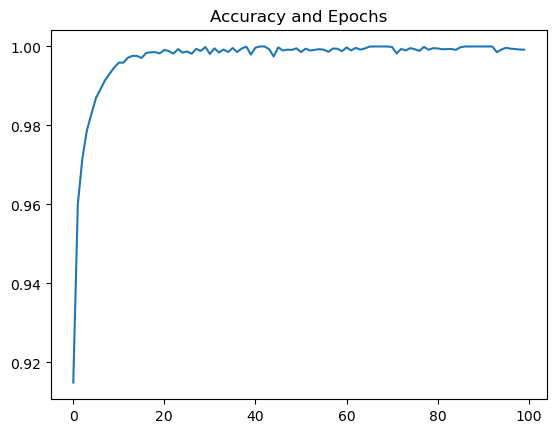

In [223]:

plt.plot(history_1.history['accuracy'])
plt.title('Accuracy and Epochs')
plt.show()


* As you can see with the addition of another hidden layer the model performance improved significantly to 97%
* moreover, the number of epochs are asymptotic with respect to the accuracy
* the next model will be the final model which will try to get as close to perfection as possible without over-fitting the sample data

### Basic CNN with multiple layers (final model)

* With this model I will be reverting back to a 28x28 matrix as tensorflow has a flatten method
    * this will make more intuitive sense as we implement the model
        * it is explained in detail in my report


In [238]:
x_train_2d = []
x_test_2d = []

for row in range(len(x_train)):
    x_train_2d.append([np.array([x_train.values[row]]).reshape(28,28)])

for row in range(len(x_test)):
    x_test_2d.append([np.array([x_test.values[row]]).reshape(28,28)])

x_train_2d = np.array(x_train_2d).reshape(48000,28,28,1)
x_test_2d = np.array(x_test_2d).reshape(12000,28,28,1)



In [240]:
from tensorflow.keras.layers import Dense, Dropout, Activation,Flatten, Conv2D, MaxPool2D

final_model = keras.Sequential()

final_model.add(Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)))
final_model.add(MaxPool2D((2,2)))
final_model.add(Conv2D(64,(3,3), activation='relu'))
final_model.add(MaxPool2D((2,2)))
final_model.add(Conv2D(64,(3,3), activation='relu'))
final_model.add(Flatten())
final_model.add(Dense(64, activation='relu'))
final_model.add(Dense(10, activation='softmax'))


# final_model.compile(optimizer='rmsprop'
#                      , loss='categorical_crossentropy',
#                      metrics=['accuracy']
#                      )

final_model.compile(optimizer='adam'
                     , loss='sparse_categorical_crossentropy',
                     metrics=['accuracy']
                     )

history = final_model.fit(x_train_2d,y_train,epochs=30)

Epoch 1/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1638 - accuracy: 0.9503
Epoch 2/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0517 - accuracy: 0.9837
Epoch 3/30
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0376 - accuracy: 0.9881
Epoch 4/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0289 - accuracy: 0.9908
Epoch 5/30
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0229 - accuracy: 0.9926
Epoch 6/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0184 - accuracy: 0.9941
Epoch 7/30
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0148 - accuracy: 0.9953
Epoch 8/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0136 - accuracy: 0.9955
Epoch 9/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0115 - accuracy: 0.9961
Epoch 10/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.009

In [241]:
final_model.evaluate(x_test_2d,y_test)

375/375 [==============================] - 1s 1ms/step - loss: 0.0581 - accuracy: 0.9912


[0.05808110907673836, 0.9912499785423279]

In [245]:
final_model_predictions = final_model.predict(x_test_2d)
final_model_predictions_labels_y = [np.argmax(i) for i in final_model_predictions]

375/375 [==============================] - 1s 1ms/step


In [242]:
final_model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_4 (Flatten)         (None, 576)             

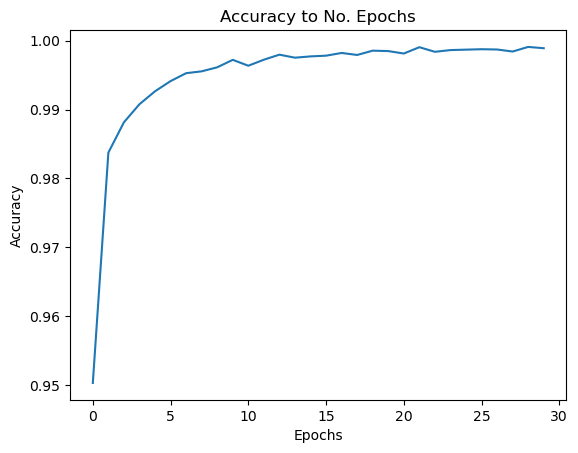

In [252]:
plt.plot(history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy to No. Epochs')
plt.show()

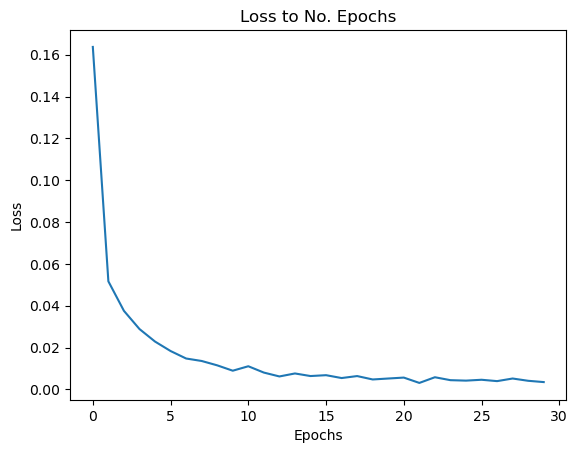

In [253]:
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss to No. Epochs')
plt.show()
plt.show()

The accuracy score for the basic model is:  0.991


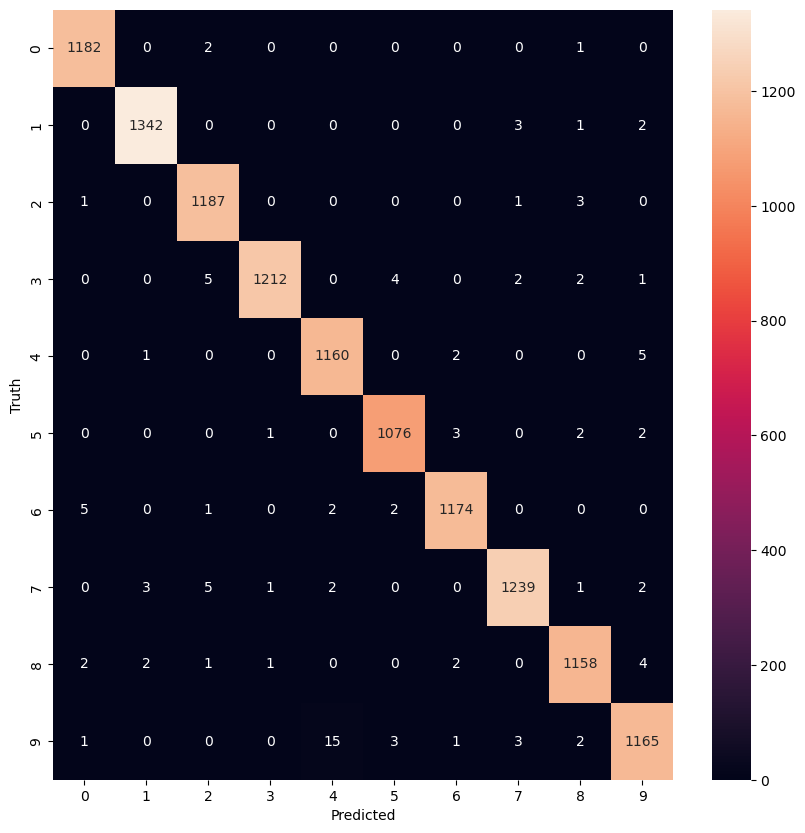

In [246]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=final_model_predictions_labels_y)

plt.figure(figsize=(10,10))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
print("The accuracy score for the basic model is: ",
    round(precision_score(final_model_predictions_labels_y,y_test, average='macro'),3))
plt.ylabel('Truth')
plt.show()

* from the final model we can see that the accuracy has massively improved due to the convolution layer 
    * all the way to 99%!
* the logic behind the layers used can be found in my report